In [3]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import io
import requests
from datetime import date, timedelta


In [4]:
url_start="https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-"
url_end=".xlsx"

try:
    day=str(date.today())
    url1 = url_start+day+url_end
    df_all=pd.read_excel(url1)
    print('Today')
except:
    day=str(date.today() - timedelta(days=1))
    url1 = url_start+day+url_end
    print('Yesterday')
    df_all=pd.read_excel(url1)

df_all['dateRep'] = df_all['dateRep'].apply(lambda x: x.date())
df_all= df_all.sort_values('dateRep')

df_all.tail(2)

Today


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
1824,2020-04-01,1,4,2020,16,2,Cuba,CU,CUB,11338138.0
0,2020-04-01,1,4,2020,25,0,Afghanistan,AF,AFG,37172386.0


In [5]:
def graph(country,date1): #same x axies
    #country = 'Japan'
    
    #Creates the new df forselected country
    df = df_all[df_all['countriesAndTerritories'].str.match(country)]
    df= df.sort_values('dateRep').reset_index()
    
    #Select data after selected date
    mask = df['dateRep'] > pd.to_datetime(date1)
    df = df.loc[mask]

    df['New Cases Trendline'] = df['cases'].rolling(3).mean()
    df['New Deaths Trendline'] = df['deaths'].rolling(3).mean()
    df=df.reset_index()

    width = 0.30 
    fig =plt.figure(figsize=(11,7))

    ax = fig.add_subplot(111) 
    ax2 = ax.twinx()
    bar1 = df['cases'].plot(kind='bar', color='blue',alpha=0.3,
                                ax=ax, width=width, 
                                position=1, label='Daily New Cases',x='index',fontsize =14)

    bar2 = df['deaths'].plot(kind='bar', color='red',alpha=0.3, 
                                 ax=ax2, width=width, 
                                 position=2, label='Daily New Deaths', x='index',fontsize =14)

    trend1 = df['New Cases Trendline'].plot(kind='line',lw=3, color='blue',ax=ax, 
                                            label='3 Days Moving Average of Daily New Cases',x='index')
    trend2 = df['New Deaths Trendline'].plot(kind='line',lw=3, color='red',ax=ax2, 
                                             label='3 Days Moving Average of Daily New Deaths',x='index')

    #Labels
    plt.title(country, fontsize=22,loc='left')
    #plt.suptitle('Data from European Centre for Disease Prevention and Control', y=1.05, fontsize=18)
    ax.set_ylabel('Daily New Cases',fontsize =14)
    ax2.set_ylabel('Daily New Deaths (Scaled to 10% of New Cases)',fontsize =14)

    #X-labels
    ax.set_xticks(np.arange(-1,len(df.dateRep),2))
    dates= df.dateRep.iloc[::2]
    ax.set_xticklabels(dates,rotation=45)

    #Set y limits
    y1_max = df.cases.max()*1.2
    y2_max = y1_max*0.1 #10% oc max cases
    
    try:
        ax2.set_ylim([0,y2_max])
    except:
        y2_max=10

    ax.set_ylim([0,y1_max])
    ax2.set_ylim([0,y2_max])

    #Gridlines
    ax.grid(axis='y',linestyle='-', linewidth=2, alpha=0.4)
         
    #Make one Ledgen
    lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    ax.legend(lines, labels,fontsize =12,loc=0 )
    plt.show()
        
    fig.tight_layout()
    fig.savefig(country)

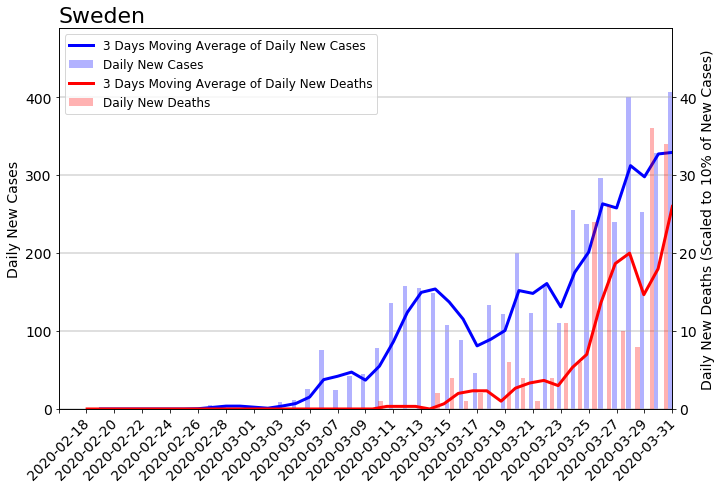

In [7]:
start_date= '2020-02-17'
graph('Sweden',start_date)

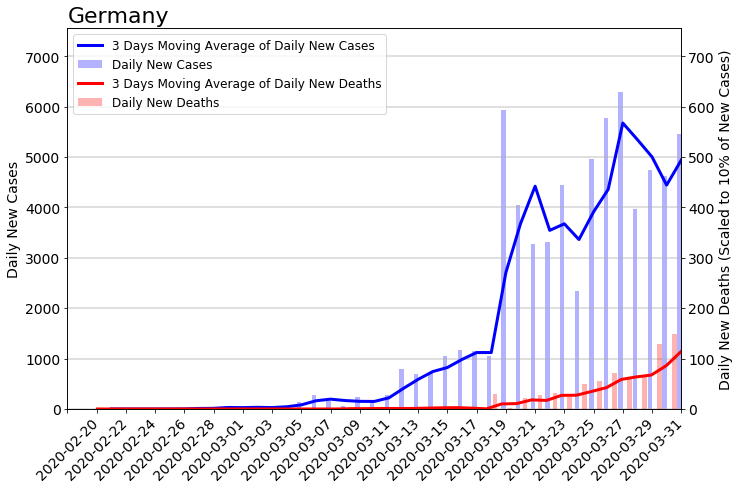

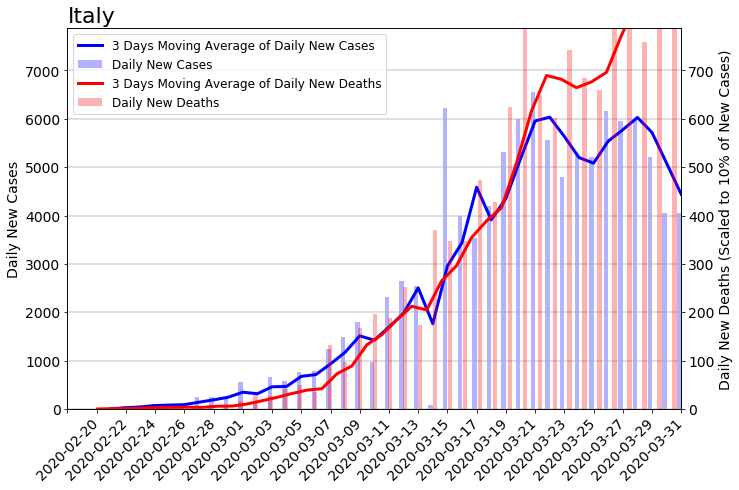

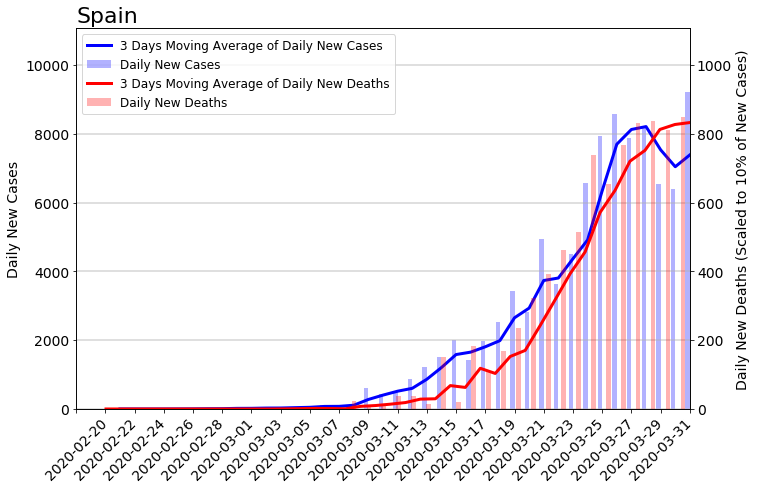

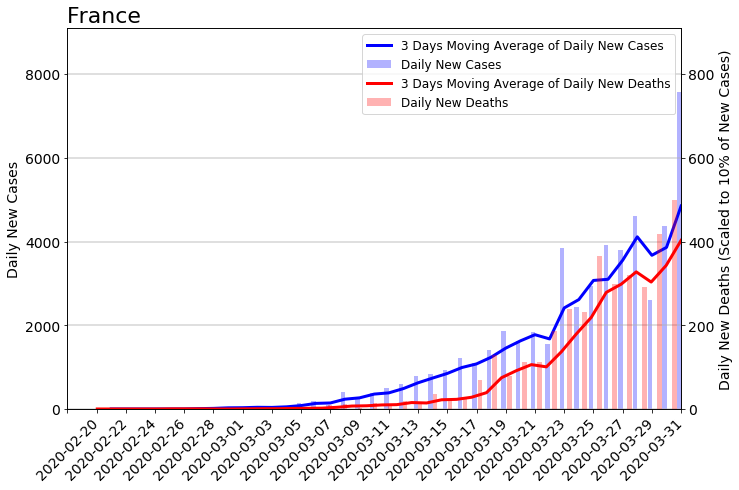

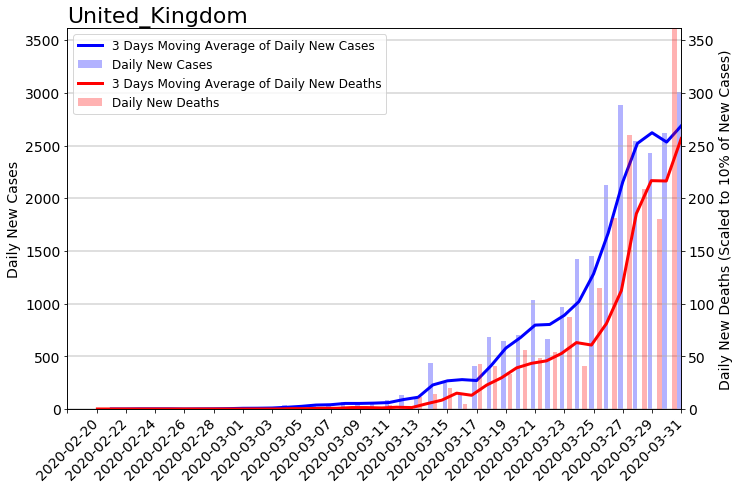

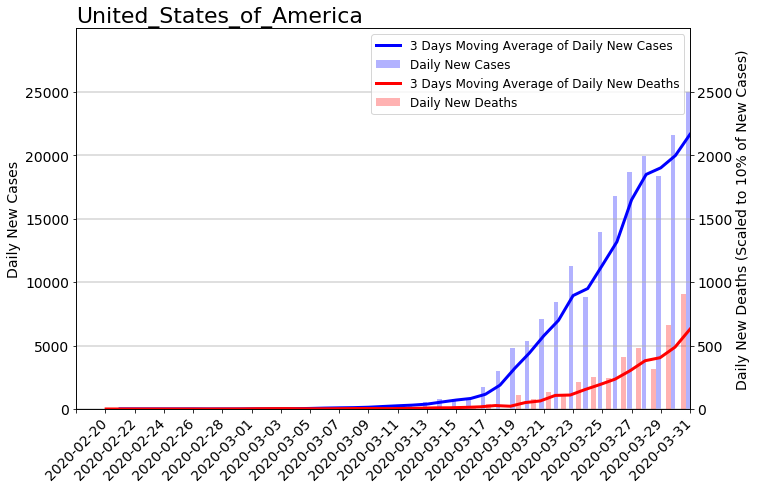

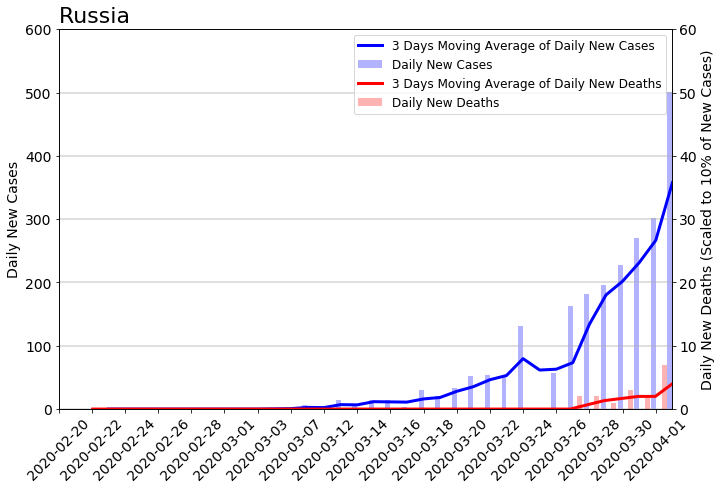

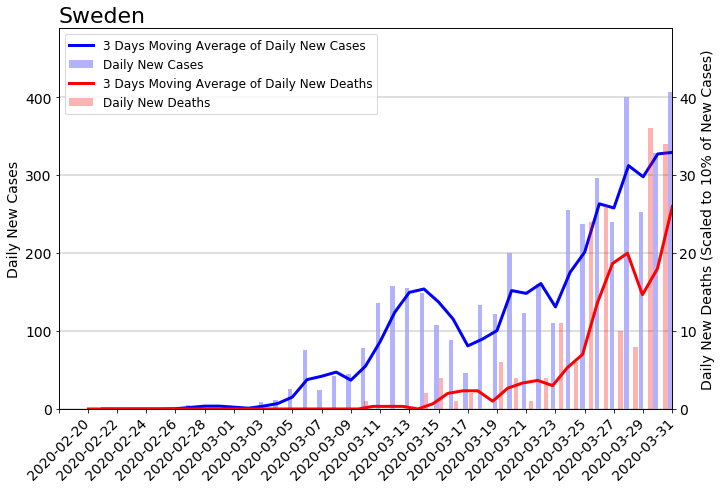

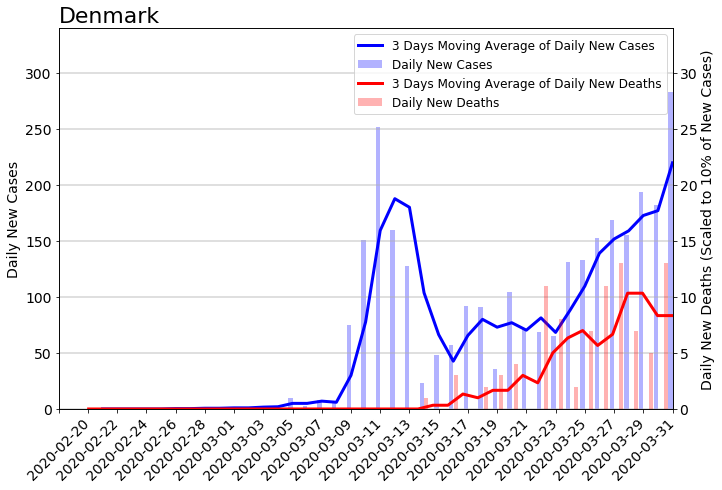

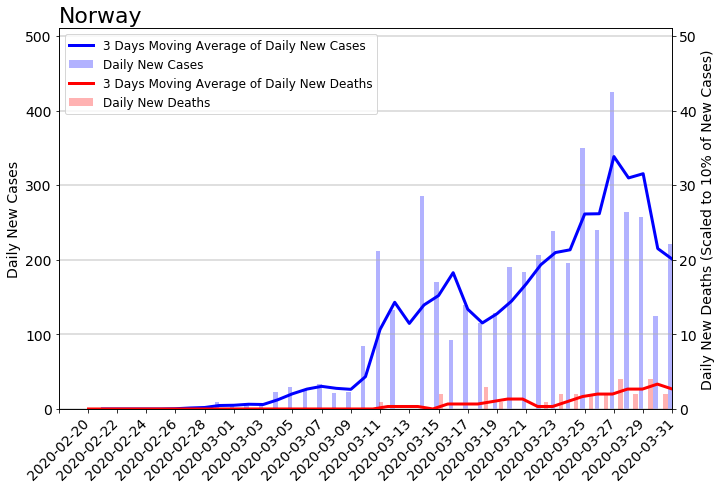

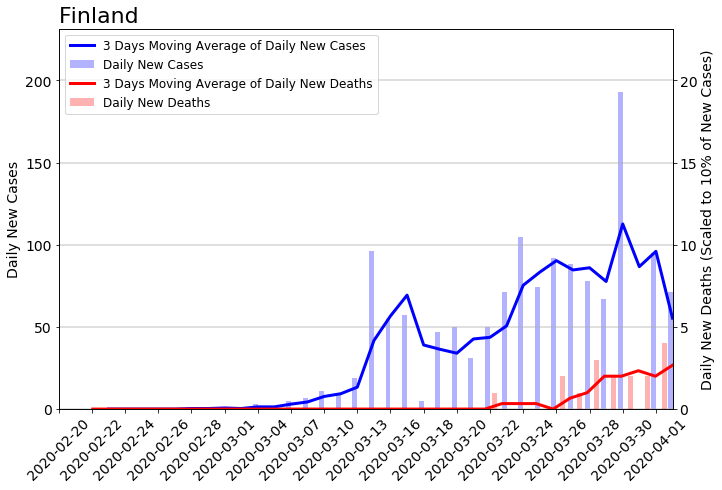

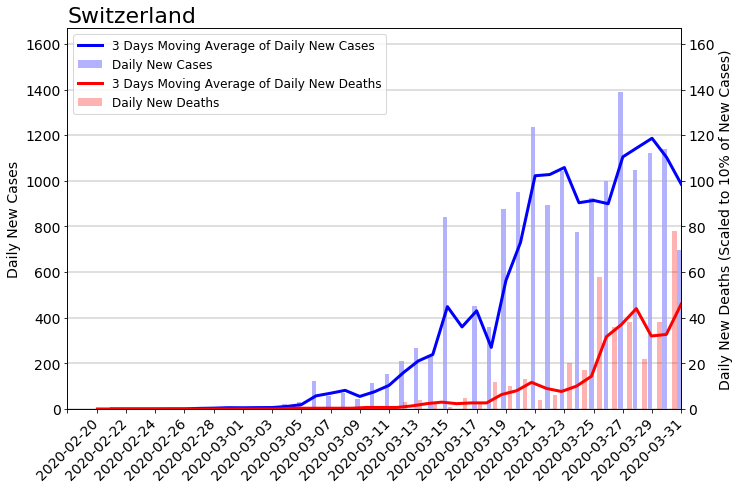

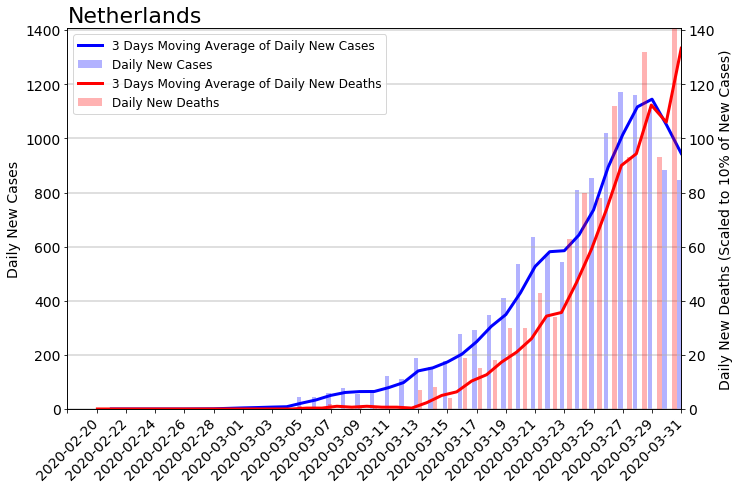

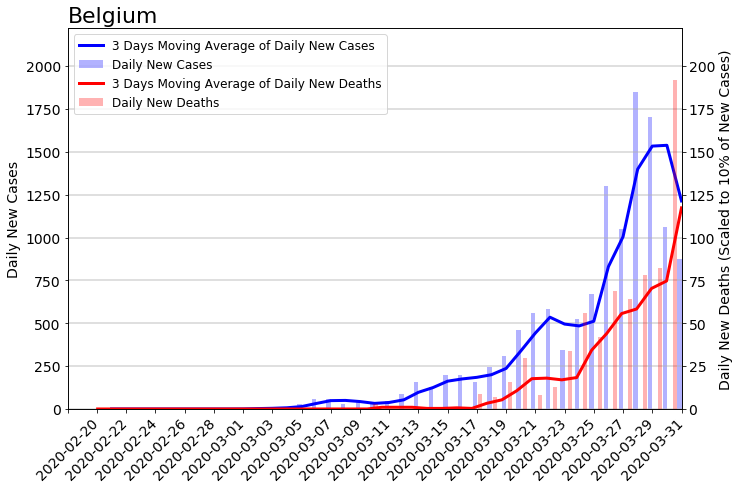

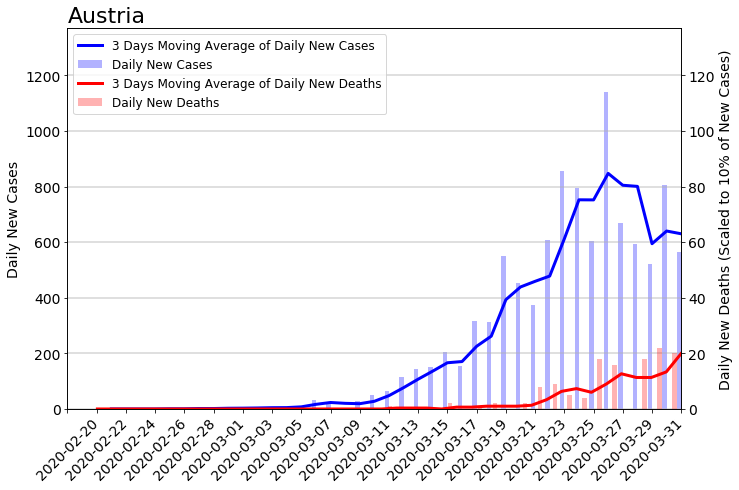

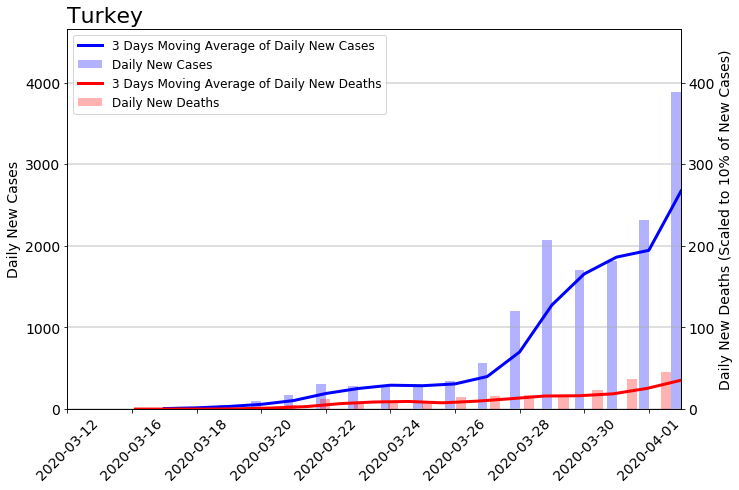

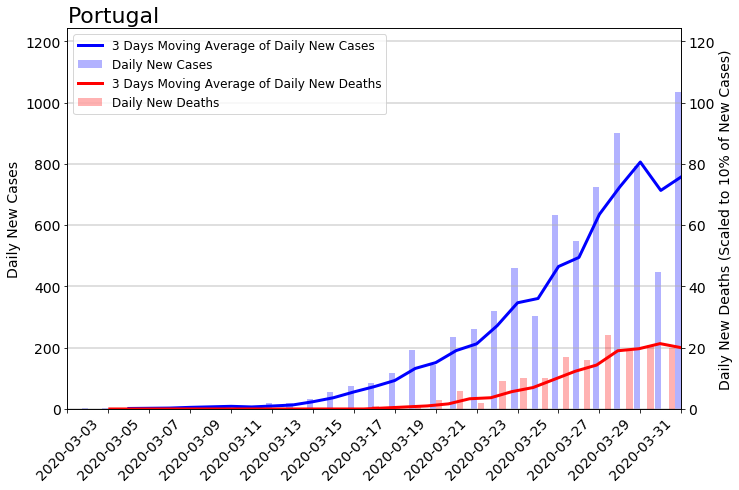

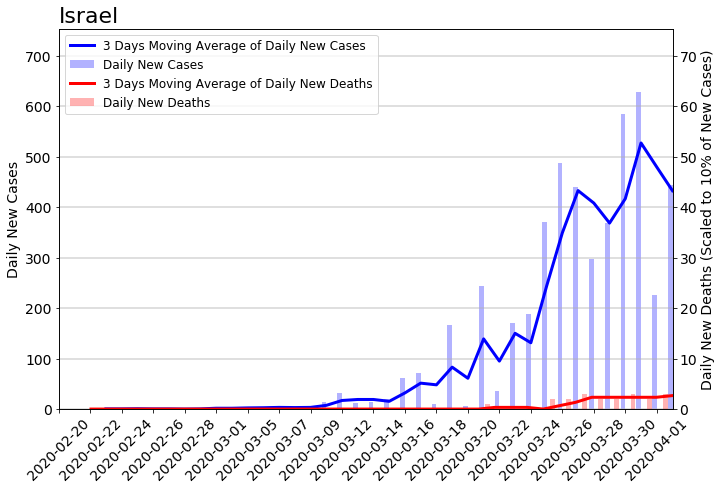

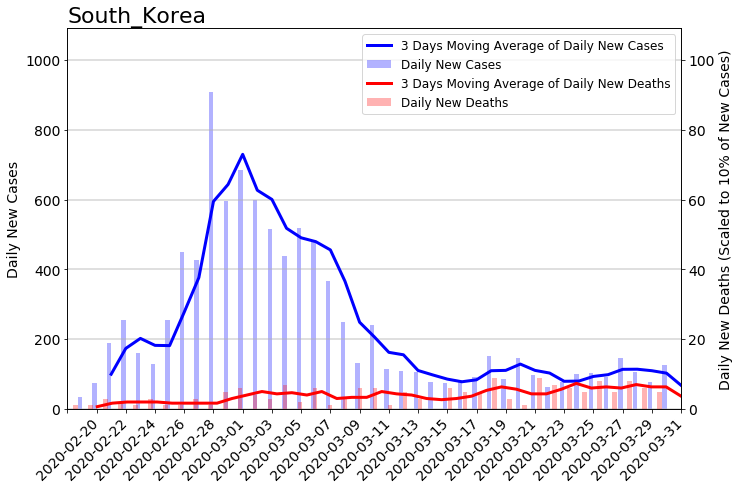

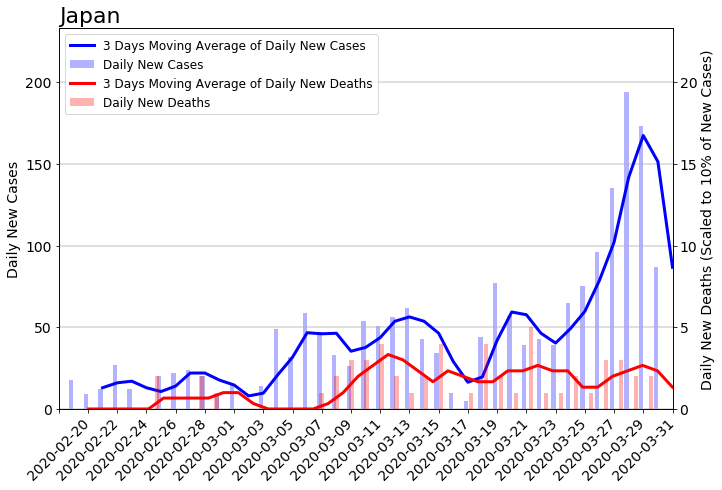

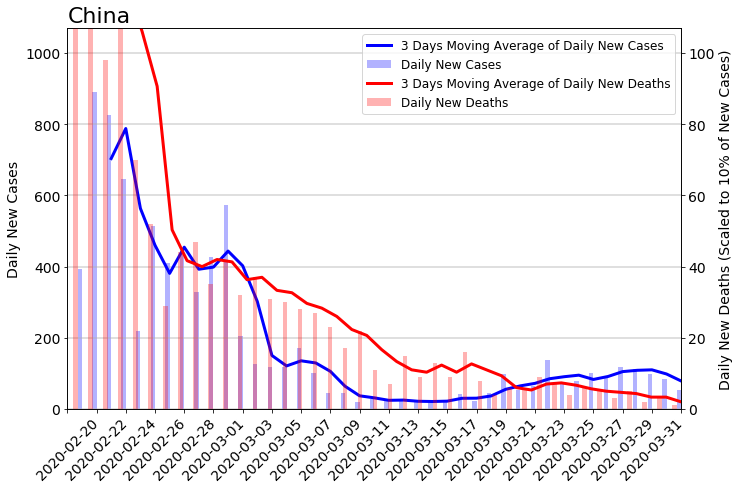

In [8]:
check = ['Germany', 'Italy', 'Spain','France',
         'United_Kingdom', 'United_States_of_America', 
         'Russia',
         'Sweden','Denmark','Norway','Finland',
         'Switzerland','Netherlands','Belgium','Austria',
         'Turkey','Portugal','Israel',
         'South_Korea', 'Japan', 'China']

start_date= '2020-02-19'

for i in check:
    graph(i,start_date)